# 统计学习2
# 作业1
提交时间：2021年3月14日24:00前

请在规定时间前上传至矩池云作业区。逾期不交者，晚交一天就多扣10分（百分制）。

简答题可在jupyter notebook中直接作答。
案例分析部分请在jupyter notebook中保存完整的代码以及运行时的输出。代码部分需要有清晰的注释，增加可读性。

注意：
同学之间可以讨论，但拒绝抄袭，一旦发现将对双方的分数均有影响。

## 1. 机器学习与深度学习的区别与联系

联系：深度学习是机器学习的一个分支。
区别：1 深度学习与传统的机器学习最主要的区别在于随着数据规模的增加，深度学习的性能也不断增长。当数据很少时，深度学习算法的性能并不好。这是因为深度学习算法需要大量的数据来完美地理解它。另一方面，在这种情况下，传统的机器学习算法使用制定的规则，性能会比较好。
2 机器学习算法的性能依赖于所提取的特征的准确度。深度学习尝试从数据中直接获取高等级的特征。
3 机器学习具有可解释性而深度学习不具有可解释性。

## 2. 如果限制一个全连接神经网络的总神经元数量（不考虑输入层）为$N+1$，输入层大小为$M_0$，输出层大小为1，隐藏层的层数为$L$，每个隐藏层的神经元数量为$N/L$，试分析参数数量和隐藏层层数$L$的关系．

(N/L)Mo+(N/L)^2+……+(N/L)^2+N/L+N+1=N/L(Mo+1+N-N/L+L)+1

## 3. 案例分析 （美食图像评分）
本案例数据来源于网上的开源项目，我们从Flickr上手机用户上传的各种食物图像，由于上传用户不同的偏好，图像的主体大小、颜色和构图都不尽相同。经过人工筛选，最终收集到了196张图像用于案例分析。为了得到每张图像的打分数据：我们组织了一个由5个人构成的研究小组，每个人对每张美食图像进行1～5分的评分，其中1分代表图像非常不吸引人，5分代表图像非常吸引人，最后取平均分作为每张图像的最终得分，从而得出本案例的因变量$Y$。需要强调一点的是，由于每个人的主观偏好不同，所以每张图像的最终打分并不能代表客观真实的评分，数据仅用于本次案例教学分析。

在本案例中，$X$变量是各种美食图像，因变量$Y$是每张图像的打分。

## 准备数据

### 读入$Y$数据

In [1]:
import pandas as pd
MasterFile = pd.read_csv('data_foodscore/FoodScore.csv') # 指定数据所在目录
print(MasterFile.shape) # 打印数据形状
MasterFile[0:5] # 展示前5行数据

(196, 2)


,ID,score
0,pic1,2.750333
1,pic2,2.962092
2,pic3,3.459351
3,pic4,2.246845
4,pic5,2.609172


In [6]:
import pytorch

从输出结果可以看到，数据集一共有196张图像，其中第1列是图像编号，第2列为得分情况。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0BB30E70>]],
      dtype=object)

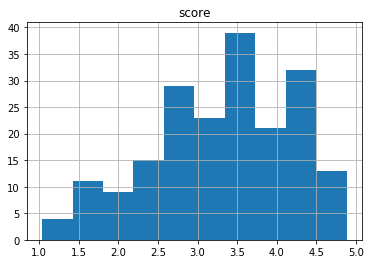

In [3]:
# 观察数据分布的形态以及是否有异常值存在
MasterFile.hist()

In [7]:
# 分离因变量Y
import numpy as np
FileNames = MasterFile['ID'] # 图像的编号也是图像的文件名
N = len(FileNames)
Y = np.array(MasterFile['score']).reshape([N, 1])#每个图象的得分变成了1个单独的list
#print(Y.shape)  #196*1


### 读入$X$数据
首先要统一所有图像的像素，将图像均转换成128像素*128像素

In [24]:
from PIL import Image

IMSIZE = 128 # 统一设定所有图像的像素
X = np.zeros([N, IMSIZE, IMSIZE, 3])
for i in range(N):
    MyFile = FileNames[i]
    Im = Image.open('data_foodscore/data_foodscore/' + MyFile + '.jpg') # 打开图像文件
    Im = Im.resize([IMSIZE, IMSIZE]) # 将图像转换成128像素*128像素
    Im = np.array(Im)/255 # 变成数组形式，除以255使得数据变为0～1之间
    X[i, ] = Im

D:\anaconda\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 432x288 with 0 Axes>

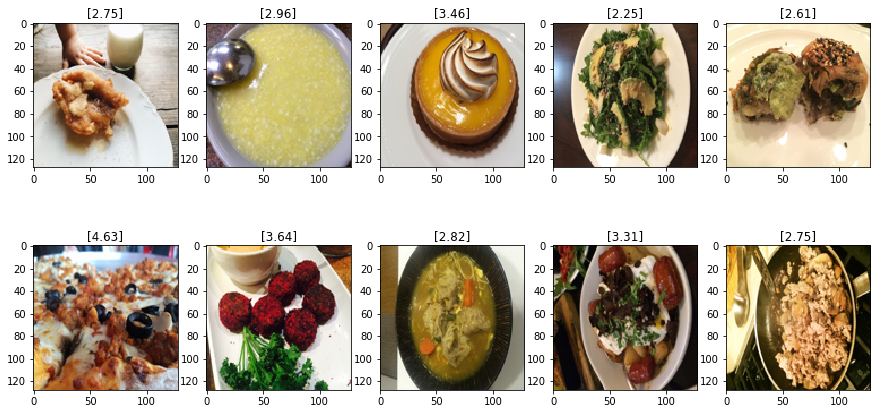

In [20]:
# 展示前10张图像
from matplotlib import pyplot as plt
plt.figure()  #铺画布
fig, ax = plt.subplots(2, 5)#2*5的画布
fig.set_figheight(7.5)
fig.set_figwidth(15)
ax = ax.flatten()  #ax = ax.flatten()将ax由n*m的Axes组展平成1*nm的Axes组
for i in range(10):
    ax[i].imshow(X[i, :, :, :])
    ax[i].set_title(np.round(Y[i], 2)) # 标题为每张图像的打分

### 切分训练集与测试集

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0) # test_size规定测试集的占比，random_state固定随机种子
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(98, 128, 128, 3) (98, 128, 128, 3) (98, 1) (98, 1)


## 3.1 线性回归模型
构建线性回归模型，使用深度学习框架进行训练，包括定义模型、损失函数、优化算法、训练模型等步骤，最后尝试输入任意一张美食图像进行打分的预测。

In [1]:
import pytorch


## 3.2 前馈神经网络（全连接神经网络）
将简单的线性回归模型改为前馈神经网络，进行训练与预测，并与3.1中的结果进行比较

## 3.3 探究超参数对训练结果以及速度的影响
可调整迭代次数、学习率、隐藏层数量、神经元数量、激活函数、优化算法等，进行结果的比较